# 3.4 Example - QEXAFS Data Processing -  XAS Merge-Export for Demeter EXAFS Modeling

## This notebook assumes that you have run
    1. 3.2 Example - QEXAFS Data Processing - Bulk Calibration, Normalization

### Goal of Workflow:

    1. Open existing experiment pickle
    2. Merge data
    3. Save Merged Spectrum and Process Params
    
  
### Merge Process:
    Step 1: Use two spectra in the experient to identify an energy value wiht a large change in absorption as a function of scan (white line intensity during reduction is a good starting point)
    Step 2: Determine which spectra are at steady state based upon change in absorption coefficient
    Step 3: Merge [subset of] spectra
    Step 4: Save merged data
    
    Note: If experiment only contains steady state data there will be very little interpretion in what spectra to merge. a first to last option is likely the default.
    
### Steps:
    1. Import Modules
    2. Define Paths
    3. Open Saved Experiment using 'pickle'
    4. Merge Spectra
    5. Visualize merge vs. single spectra
    6. Save merged dataset

### Things to have ready when attemtping this example:
    1. Directory and filename where the experiment object (pickle) is saved
    2. Directory and filenames for where to save merged filed and merged process params

## Step 1. Import Modules

In [1]:
# DO NOT MODIFY BELOW

# File Handling
import os
import pickle

# Array Handling
import numpy as np
import pandas as pd

# Make Plotting Interactive
from ipywidgets import interact, fixed, widgets

# Wrapper for xraylarch (larch)
os.chdir('..')
pwd = os.getcwd()
os.chdir('./catxas')
import general as fcts
import xas as xfcts
import plot as pfcts
import process
import experiment as exp

# Plot Handling
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

## Step 2. Define Paths

#### Modify:
    1. pickle_dir - directory where to save the experiment
    2. pickpe_name - filename of the saved experiment (must include extension '.pickle')
    3. output_dir - where to save merged data
    4. merge_fname - merged spectra file name
    5. process_fname - merged process parameters filename

In [2]:
# Directory Containing Experiment:
pickle_dir = r'D:\UU QEXAFS Workup\Nina - BF31\Fe Edge\Up\Results\Step B'

# Name of Experiment (must include extension '.pickle')
pickle_name = 'BF31-Fe-B.pickle'

# Directory where to save merged data
output_dir = r'D:\UU QEXAFS Workup\Nina - BF31\Fe Edge\Up\Results\Step B'

# Merged spectra filename for saving
merge_fname = r'State B Post Reduction'

# Merged process parameters filename for saving
process_fname = r'State B Post Reduction - params'

## Step 3. Open Saved Experiment using 'pickle'

    Pickle - A method to save the experimental class and reopen it elsewhere.

In [3]:
# DO NOT MODIFY BELOW

pickle_path = os.path.join(pickle_dir,pickle_name)
pickle_in = open(pickle_path,"rb")
my_exp = pickle.load(pickle_in)
pickle_in.close()

## Step 4. Merge Subset of Data in Experiment

Substeps:
    a. Get list of spectra names in experiment
    b. Plot two spectra to determine energy with greated change in mu
    c. Plot mu(E) for all spectra to determine were steady state is
    d. Define range of spectra to merge
    e. Create merged spectra
    
### 4a. Get list of spectra names in experiment

In [4]:
# DO NOT MODIFY BELOW

spectra_list = list(my_exp.spectra.keys())

### 4b. Plot two spectra to determine energy with greated change in mu

In [5]:
# Select which spectra to plot (0/-1 are first/last, respectively)
scan1 = spectra_list[0]
scan2 = spectra_list[-1]

# Set energy range for plotting
emin = 7100
emax = 7150

In [6]:
# Plot first and last spectra

# DO NOT MODIFY BELOW

x1 = my_exp.spectra[scan1]['Absorption Spectra']['mu Sample'].energy
y1 = my_exp.spectra[scan1]['Absorption Spectra']['mu Sample'].flat

x2 = my_exp.spectra[scan2]['Absorption Spectra']['mu Sample'].energy
y2 = my_exp.spectra[scan2]['Absorption Spectra']['mu Sample'].flat

xy_list = [[x1, y1], [x2, y2]]

vline_pos = widgets.FloatSlider(value = (emin+emax)/2, min = emin, max = emax, step = 0.1, description = 'Energy:') 
axis_label = ['Photon Energy (eV)','Norm mux'] 
size = [12, 10]

interact(pfcts.plot_XYs_Vline, 
         xy_list = fixed(xy_list), 
         vline_pos = vline_pos, 
         emin = fixed(emin), 
         emax = fixed(emax), 
         axis_label = fixed(axis_label), 
         size = fixed(size))

interactive(children=(FloatSlider(value=7125.0, description='Energy:', max=7150.0, min=7100.0), Output()), _do…

<function plot.plot_XYs_Vline(xy_list, vline_pos, emin, emax, axis_label=['Photon Energy (eV)', 'Norm mux'], size=[12, 10])>

### 4c. Plot mu(E) for all spectra to determine were steady state is

In [7]:
# value of energy selected from plot above
energy_pt = 7132.50

In [8]:
# DO NOT MODIFY BELOW

# Part 1: Build XY table form spectra

# Convert spectra list postiion to integer list
spectra_list_number = list(range(len(spectra_list)))

# get flat Norm(mux) value closest to largest energy variation
spectra_mu = []

for key in my_exp.spectra.keys():  
    # find closest energy point
    idx = fcts.find_nearest(my_exp.spectra[key]['Absorption Spectra']['mu Sample'].energy, energy_pt)
    
    #get flattened mu value and append to spectra_mu list
    spectra_mu.append(my_exp.spectra[key]['Absorption Spectra']['mu Sample'].flat[idx[0]])
    
SpecMu_list = [[spectra_list_number, spectra_mu]]

# Part 2: Plot mu vs spectra position in list

spectra_min = 0
spectra_max = len(spectra_list)


vline_pos = widgets.IntSlider( value = (spectra_min+spectra_max)/2, min = spectra_min, max = spectra_max, step = 1, description = 'List Number:') 
axis_label = ['Spectra Position in List','Norm mux'] 
size = [12, 10]

interact(pfcts.plot_XYs_Vline, 
         xy_list = fixed(SpecMu_list), 
         vline_pos = vline_pos, 
         emin = fixed(spectra_min), 
         emax = fixed(spectra_max), 
         axis_label = fixed(axis_label), 
         size = fixed(size))

interactive(children=(IntSlider(value=1271, description='List Number:', max=2542), Output()), _dom_classes=('w…

<function plot.plot_XYs_Vline(xy_list, vline_pos, emin, emax, axis_label=['Photon Energy (eV)', 'Norm mux'], size=[12, 10])>

### 4d. Define range of spectra to merge

In [9]:
# Use slider above to idenfity the index of the spectra for merging between.

steaty_state_starts = 2000

steaty_state_ends = 2542

### 4e. Create merged spectra

In [10]:
# DO NOT MODIFY BELOW

merged_spectra = exp.merge_spectra(my_exp, spectra_list[steaty_state_starts:steaty_state_ends])

## Step 5. Visualize merge vs. single spectra

In [11]:
# Specrta_list index to compare merge against
    
index_value = steaty_state_starts

emin = 7100
emax = 7150

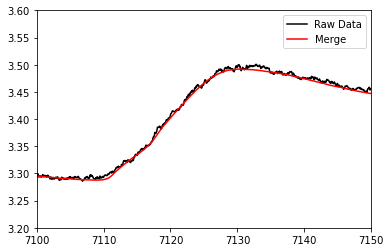

In [12]:
# modify as needed to zoom in in Y axis

ymin = 3.2
ymax = 3.6

# DO NOT MODIFY BELOW

x1 = my_exp.spectra[spectra_list[index_value]]['Absorption Spectra']['mu Sample'].energy
y1 = my_exp.spectra[spectra_list[index_value]]['Absorption Spectra']['mu Sample'].mu

x2 = merged_spectra['Absorption Spectra']['mu Sample'].energy
y2 = merged_spectra['Absorption Spectra']['mu Sample'].mu

plt.plot(x1,y1, color = 'k', label = 'Raw Data')
plt.plot(x2,y2, color = 'r', label = 'Merge')
plt.xlim(emin, emax)
plt.ylim(ymin,ymax)
plt.legend()

## Step 6. Save merged dataset

In [13]:
# DO NOT MODIFY BELOW

data = {
    'Energy': merged_spectra['Absorption Spectra']['mu Sample'].energy[10:],
    'Sample mu': merged_spectra['Absorption Spectra']['mu Sample'].mu[10:],
    'Ref mu': merged_spectra['Absorption Spectra']['mu Reference'].mu[10:],
}

df = pd.DataFrame(data)

# interpolate to dateset smaller than 5k data points if needed
if df['Energy'].size > 5000:
    
    start = df['Energy'].iloc[0]
    stop = df['Energy'].iloc[-1]
    step = 0.25
    
    # Make new energy list
    new_E = np.arange(start, stop+step, step)
    
    # Interpolate Date
    df.set_index('Energy', inplace = True)
    
    df = fcts.interp_df(df,new_E)

# Save Merge Spectra
df.to_csv(os.path.join(output_dir, merge_fname + '.csv'), sep=',', na_rep='', header=True, index=True)

# Save Process Params
merged_spectra['Process Values'].to_csv(os.path.join(output_dir, process_fname + '.csv'), sep=',', na_rep='', header=True, index=True)